In [2]:
import nflgame
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import scipy.stats as ss

In [3]:
numb= np.arange(1,18).tolist()
games = nflgame.games(2016, week=numb)
players = nflgame.combine_game_stats(games)

In [4]:
namelist = []
rushattlist= []
rushydslist= []
rushtdlist = []

for p in players.rushing().sort('rushing_yds').limit(100):
    namelist.append(p)
    rushattlist.append(int(p.rushing_att))
    rushydslist.append(int(p.rushing_yds))
    rushtdlist.append(int(p.rushing_tds))
data = {'Player': namelist,
       'Rush Att': rushattlist,
       'Rush Yds': rushydslist,
       'Rush TD': rushtdlist}

df = pd.DataFrame(data,columns= ['Player','Rush Att','Rush Yds','Rush TD'])
df.insert(4, 'Fantasy Pts', df['Rush Yds']*0.1 + df['Rush TD']*6)
df.sort_values('Fantasy Pts',ascending=False).head(7)

,Player,Rush Att,Rush Yds,Rush TD,Fantasy Pts
0,E.Elliott,322,1631,15,253.1
7,L.Blount,299,1161,18,224.1
6,D.Johnson,293,1239,16,219.9
5,L.McCoy,234,1267,13,204.7
2,D.Murray,293,1287,9,182.7
3,J.Ajayi,261,1272,8,175.2
8,D.Freeman,227,1079,11,173.9


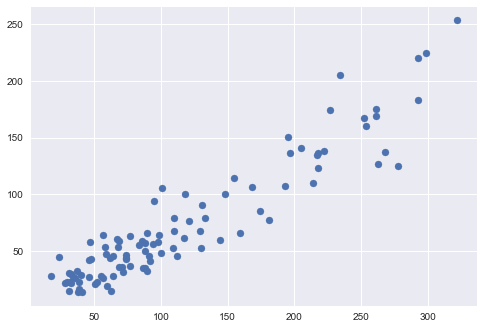

In [5]:
plt.scatter(df['Rush Att'],(df['Rush TD'] * 6)+(df['Rush Yds'] * .1))

In [6]:
weeks= {}
for n in numb:
    games = nflgame.games(2016, week=n)
    players = nflgame.combine_game_stats(games)
    namelist = []
    teamlist = []
    rushattlist= []
    rushydslist= []
    rushtdlist = []

    for p in players.rushing().sort('rushing_yds').limit(150):
        namelist.append(p.name)
        teamlist.append(p.team)
        rushattlist.append(int(p.rushing_att))
        rushydslist.append(int(p.rushing_yds))
        rushtdlist.append(int(p.rushing_tds))
    data = {'Player': namelist,
            'Team': teamlist,
           'Rush Att': rushattlist,
           'Rush Yds': rushydslist,
           'Rush TD': rushtdlist}
    

    
    df = pd.DataFrame(data,columns= ['Player','Team','Rush Att','Rush Yds','Rush TD'])
    df['Week']= n
    df['Fantasy Pts'] = (df['Rush Yds'] /10) + (df['Rush TD'] * 6)
    weeks[n]=df

alldata= weeks[1]
for n in np.arange(2,17):
    alldata = pd.concat([alldata,weeks[n]])


In [7]:
jeff = alldata.groupby(['Player','Team']).agg({'Rush Att': np.sum,'Rush Yds':np.sum,'Week':np.size,'Rush TD':np.sum,'Fantasy Pts':np.sum}).sort_values('Fantasy Pts',ascending=False)
jeff.head(12)

,,Rush Yds,Week,Fantasy Pts,Rush TD,Rush Att
Player,Team,,,,,
E.Elliott,DAL,1631,15,253.1,15,322
D.Johnson,ARI,1233,15,219.3,16,288
L.Blount,NE,1110,15,213.0,17,285
L.McCoy,BUF,1257,14,203.7,13,229
D.Murray,TEN,1266,15,180.6,9,282
J.Ajayi,MIA,1213,14,169.3,8,245
L.Bell,PIT,1268,12,168.8,7,261
M.Gordon,SD,997,13,159.7,10,254
D.Freeman,ATL,983,15,158.3,10,215


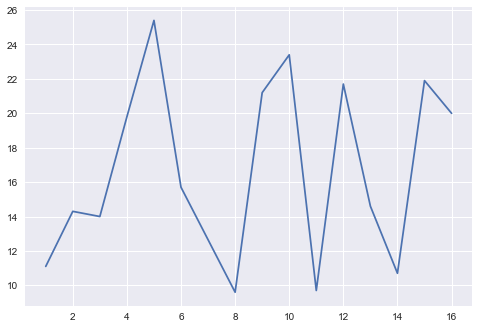

In [8]:
barbie = alldata.loc[:,('Player','Team', 'Week','Fantasy Pts')]
barbie['ID'] = barbie.loc[:,('Player')] + ' ' + barbie.loc[:,('Team')]
del barbie['Player']
del barbie['Team']
barbie= barbie[(barbie['ID']== 'E.Elliott DAL')]
fig=plt.figure()
fig, axes = plt.subplots(1,1)
x= barbie.loc[:,('Week')]
y= barbie.loc[:,('Fantasy Pts')]
plot(x,y,'-')

In [9]:
barbie.dtypes

Week             int64
Fantasy Pts    float64
ID              object
dtype: object